In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from  warnings import simplefilter
simplefilter('ignore')

In [2]:
df = pd.read_csv('Salaries.csv',index_col='Id')

print(df.shape)

df.head()

(148648, 12)


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.Year.unique()

array([2011, 2012, 2013, 2014], dtype=int64)

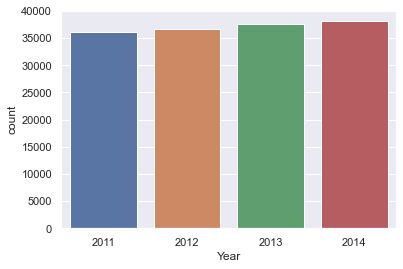

In [4]:
sns.countplot(df.Year);

#### 1. How much total salary cost has increased from year 2011 to 2014?

In [5]:
t =df.groupby('Year')['TotalPayBenefits'].sum()
t

Year
2011    2.594113e+09
2012    3.696790e+09
2013    3.814772e+09
2014    3.821866e+09
Name: TotalPayBenefits, dtype: float64

In [6]:
(t[2014]-t[2011])*100/t[2011]


47.32842151982706

**ans**:47%

#### Q2. Who was the top-earning employee across all the years?

In [7]:
df.TotalPayBenefits.argmax()

0

In [8]:
df.iloc[[df.TotalPayBenefits.argmax()]]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [9]:
df.iloc[[df.TotalPayBenefits.argmax()],[0]]

,EmployeeName
Id,
1,NATHANIEL FORD


##### or

In [10]:
df.TotalPayBenefits.idxmax()

1

In [11]:
df.loc[[df.TotalPayBenefits.idxmax()]]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [12]:
df.loc[[df.TotalPayBenefits.idxmax()],['EmployeeName']]

,EmployeeName
Id,
1,NATHANIEL FORD


In [13]:
df.TotalPayBenefits.max()

567595.43

In [14]:

df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


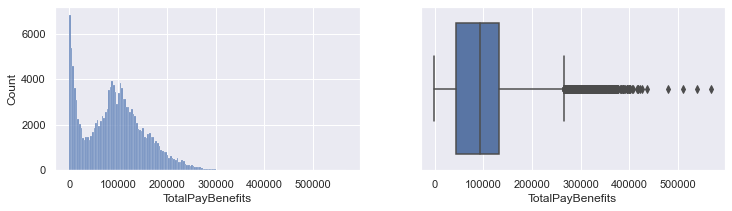

In [15]:
f,  a= plt.subplots(1,2,figsize=(12,3))

sns.histplot(x=df.TotalPayBenefits,ax=a[0])
sns.boxplot(x=df.TotalPayBenefits,ax=a[1]);

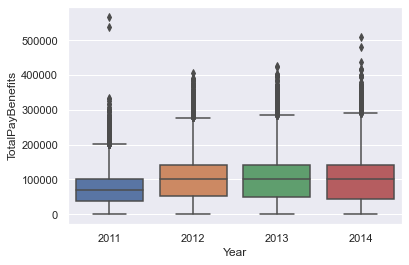

In [16]:
sns.boxplot(x=df.Year,y=df.TotalPayBenefits);

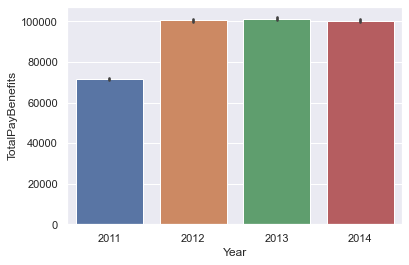

In [17]:
sns.barplot(x='Year',y='TotalPayBenefits',data=df);

In [18]:
df.groupby('Year')['TotalPayBenefits'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36158.0,71743.819645,47499.332679,0.00,36809.030,68212.150,102514.2800,567595.43
2012,36765.0,100551.886807,63556.139797,1.91,51740.530,101749.190,142391.8700,407274.78
2013,37606.0,101440.519714,66390.034642,-33.89,48259.600,101969.445,142793.6875,425815.28
2014,38119.0,100261.438668,66234.366433,-618.13,44254.935,101108.510,142749.5850,510732.68
